In [2]:
import tensorflow as tf 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import load_model
import pickle
import os 
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import random
import seaborn as sn
import pandas as pd

In [3]:
# load cifar-10 for the test set
(train_x, train_y), (test_x, test_y) = cifar10.load_data()
classes = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
print(test_y)

[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


# Experiments with full CIFAR-10 Dataset

In [3]:
#load basic dicriminator
densenet = load_model("Vanilla/densenet.h5")
_eval = densenet.evaluate(test_x, test_y)
predictions = densenet.predict(test_x)
predictions = [np.argmax(p) for p in predictions]
labels = np.reshape(test_y, (len(predictions)))

313/313 [==============================] - 24s 77ms/step - loss: 1.5212 - sparse_categorical_accuracy: 0.9394


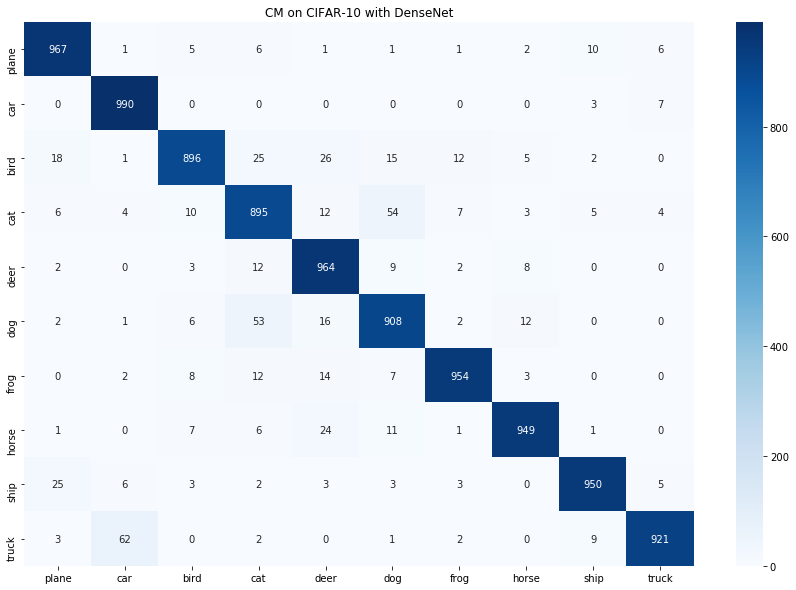

In [4]:
cm = tf.math.confusion_matrix(labels, predictions, num_classes=10)
plt.figure(figsize=(15,10))
plt.title('CM on CIFAR-10 with DenseNet')
sn.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt="d", xticklabels=classes, yticklabels=classes)

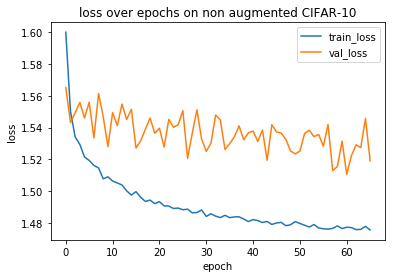

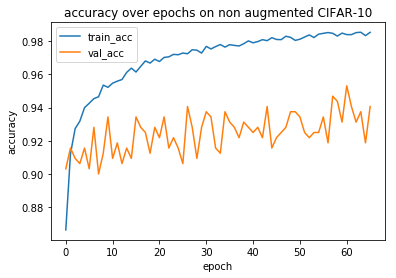

In [5]:
history = pickle.load(open('Vanilla/history.p', 'rb'))

plt.plot(range(0,len(history['loss'])),history['loss'], label='train_loss')
plt.plot(range(0,len(history['val_loss'])),history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss over epochs on non augmented CIFAR-10')
plt.legend()
plt.show()

plt.plot(range(0,len(history['sparse_categorical_accuracy'])),history['sparse_categorical_accuracy'], label='train_acc')
plt.plot(range(0,len(history['val_sparse_categorical_accuracy'])),history['val_sparse_categorical_accuracy'], label='val_acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy over epochs on non augmented CIFAR-10')
plt.legend()
plt.show()

In [6]:
#load dicriminator trained on real + fake
densenet_fake = load_model("GAN/densenet_fake.h5")
_eval2 = densenet_fake.evaluate(test_x, test_y)
predictions = densenet_fake.predict(test_x)
predictions = [np.argmax(p) for p in predictions]
labels = np.reshape(test_y, (len(predictions)))

313/313 [==============================] - 23s 75ms/step - loss: 1.5192 - sparse_categorical_accuracy: 0.9419


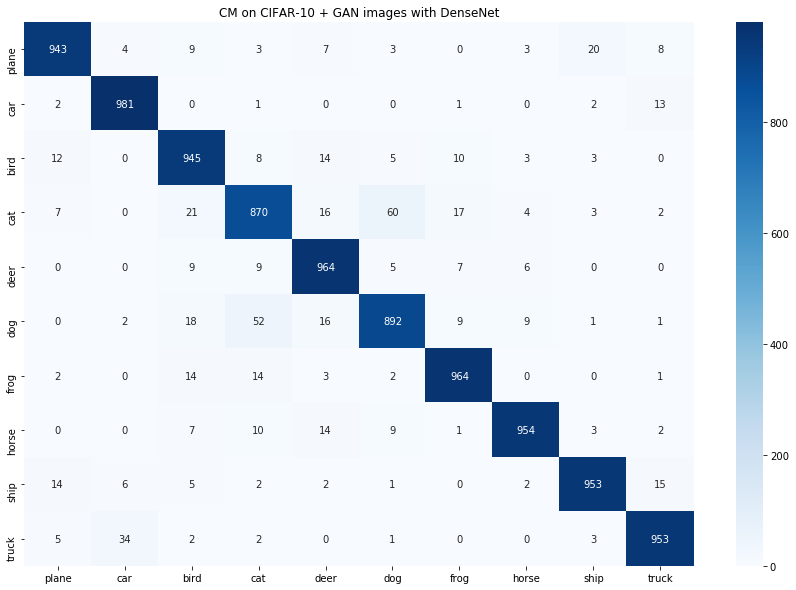

In [7]:
cm = tf.math.confusion_matrix(labels, predictions, num_classes=10)
plt.figure(figsize=(15,10))
plt.title('CM on CIFAR-10 + GAN images with DenseNet')
sn.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt="d", xticklabels=classes, yticklabels=classes)

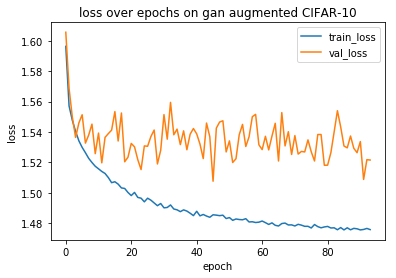

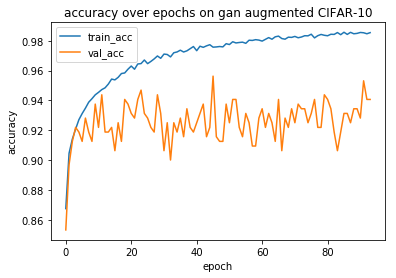

In [8]:
history = pickle.load(open('GAN/history_fake.p', 'rb'))

plt.plot(range(0,len(history['loss'])),history['loss'], label='train_loss')
plt.plot(range(0,len(history['val_loss'])),history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss over epochs on gan augmented CIFAR-10')
plt.legend()
plt.show()

plt.plot(range(0,len(history['sparse_categorical_accuracy'])),history['sparse_categorical_accuracy'], label='train_acc')
plt.plot(range(0,len(history['val_sparse_categorical_accuracy'])),history['val_sparse_categorical_accuracy'], label='val_acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy over epochs on gan augmented CIFAR-10')
plt.legend()
plt.show()

In [9]:
#load dicriminator with traditional augmentation
densenet_trad = load_model("Traditional/densenet_traditional.h5")
_eval3 = densenet_trad.evaluate(test_x, test_y)
predictions = densenet_trad.predict(test_x)
predictions = [np.argmax(p) for p in predictions]
labels = np.reshape(test_y, (len(predictions)))

313/313 [==============================] - 23s 75ms/step - loss: 1.5127 - sparse_categorical_accuracy: 0.9486


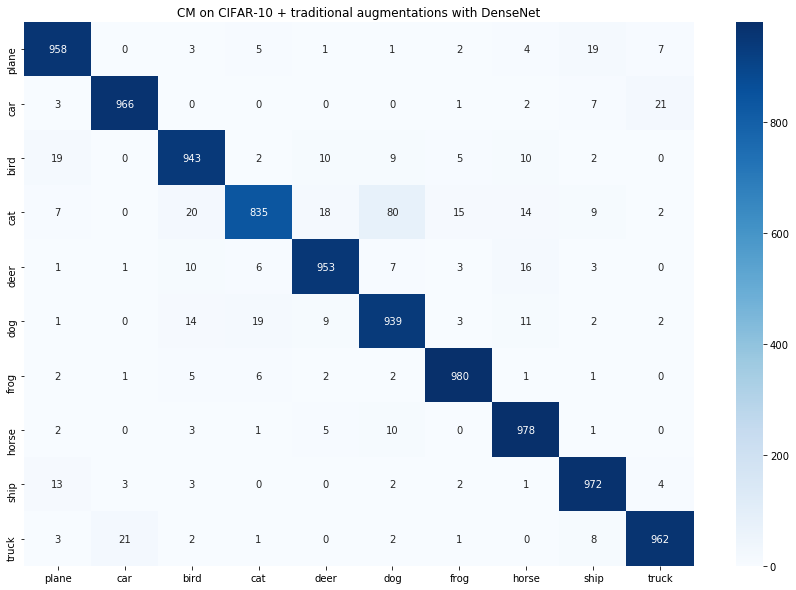

In [10]:
cm = tf.math.confusion_matrix(labels, predictions, num_classes=10)
plt.figure(figsize=(15,10))
plt.title('CM on CIFAR-10 + traditional augmentations with DenseNet')
sn.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt="d", xticklabels=classes, yticklabels=classes)

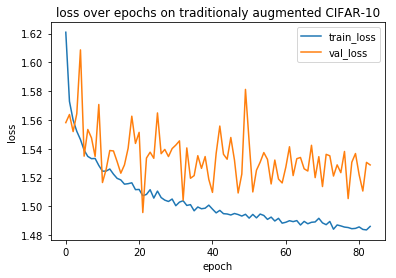

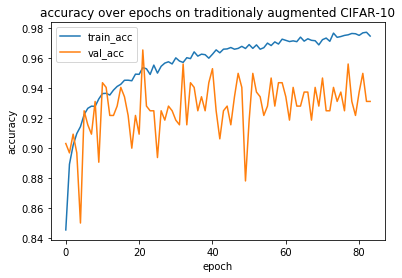

In [11]:
history = pickle.load(open('Traditional/history_traditional.p', 'rb'))

plt.plot(range(0,len(history['loss'])),history['loss'], label='train_loss')
plt.plot(range(0,len(history['val_loss'])),history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss over epochs on traditionaly augmented CIFAR-10')
plt.legend()
plt.show()

plt.plot(range(0,len(history['sparse_categorical_accuracy'])),history['sparse_categorical_accuracy'], label='train_acc')
plt.plot(range(0,len(history['val_sparse_categorical_accuracy'])),history['val_sparse_categorical_accuracy'], label='val_acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy over epochs on traditionaly augmented CIFAR-10')
plt.legend()
plt.show()

# Experiments with half of the CIFAR-10 Dataset

In [12]:
#load basic dicriminator 
densenet = load_model("Vanilla/densenet_halved.h5")
_eval = densenet.evaluate(test_x, test_y)
predictions = densenet.predict(test_x)
predictions = [np.argmax(p) for p in predictions]
labels = np.reshape(test_y, (len(predictions)))

313/313 [==============================] - 24s 75ms/step - loss: 1.5370 - sparse_categorical_accuracy: 0.9239


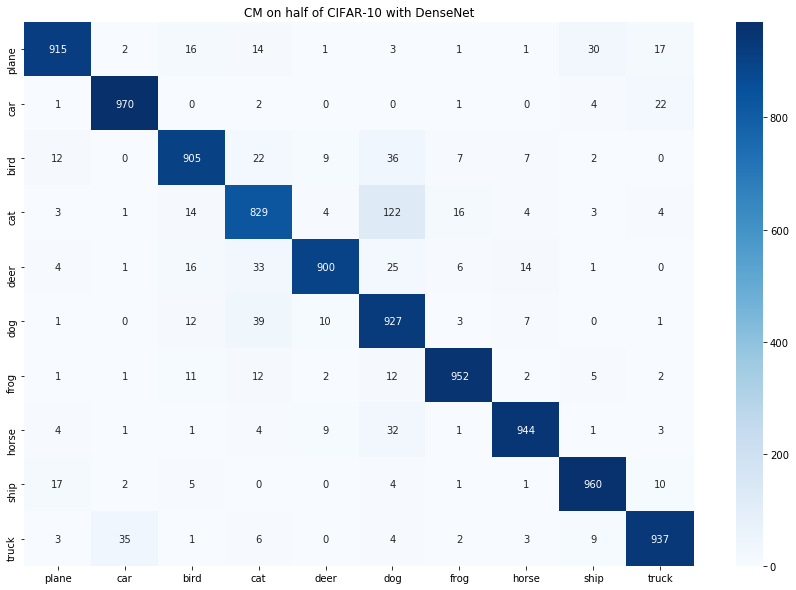

In [13]:
cm = tf.math.confusion_matrix(labels, predictions, num_classes=10)
plt.figure(figsize=(15,10))
plt.title('CM on half of CIFAR-10 with DenseNet')
sn.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt="d", xticklabels=classes, yticklabels=classes)

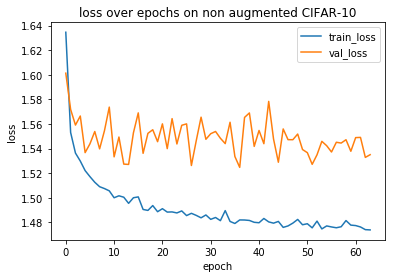

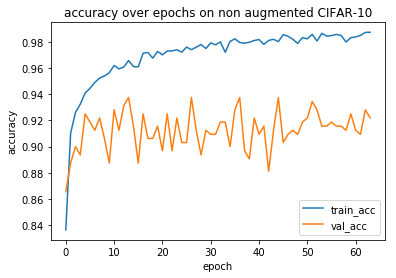

In [14]:
history = pickle.load(open('Vanilla/history_halved.p', 'rb'))

plt.plot(range(0,len(history['loss'])),history['loss'], label='train_loss')
plt.plot(range(0,len(history['val_loss'])),history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss over epochs on non augmented CIFAR-10')
plt.legend()
plt.show()

plt.plot(range(0,len(history['sparse_categorical_accuracy'])),history['sparse_categorical_accuracy'], label='train_acc')
plt.plot(range(0,len(history['val_sparse_categorical_accuracy'])),history['val_sparse_categorical_accuracy'], label='val_acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy over epochs on non augmented CIFAR-10')
plt.legend()
plt.show()

In [15]:
#load dicriminator trained on real + fake
densenet_fake = load_model("GAN/densenet_fake_halved.h5")
_eval2 = densenet_fake.evaluate(test_x, test_y)
predictions = densenet_fake.predict(test_x)
predictions = [np.argmax(p) for p in predictions]
labels = np.reshape(test_y, (len(predictions)))

313/313 [==============================] - 24s 76ms/step - loss: 1.5342 - sparse_categorical_accuracy: 0.9267


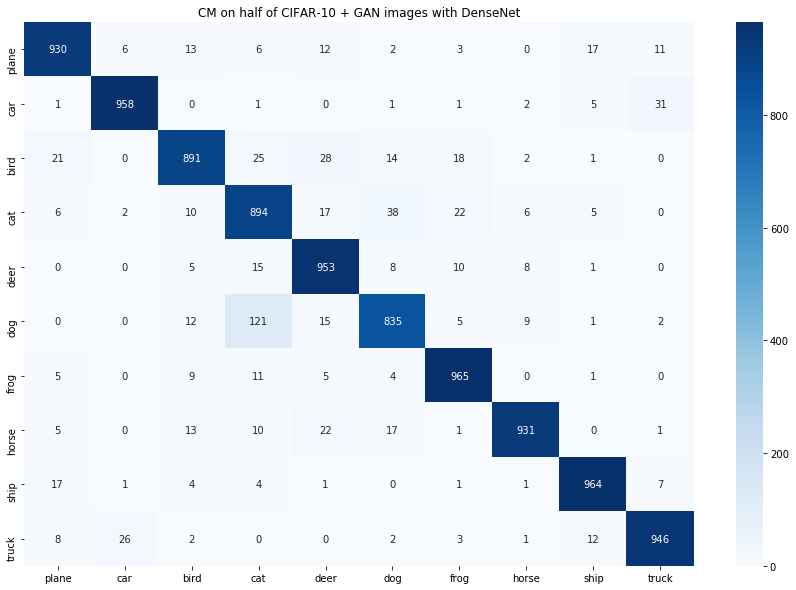

In [16]:
cm = tf.math.confusion_matrix(labels, predictions, num_classes=10)
plt.figure(figsize=(15,10))
plt.title('CM on half of CIFAR-10 + GAN images with DenseNet')
sn.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt="d", xticklabels=classes, yticklabels=classes)

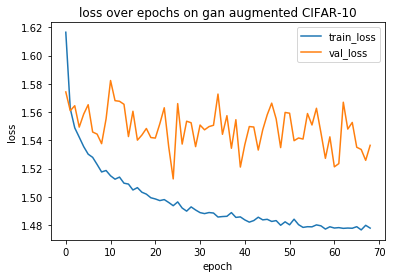

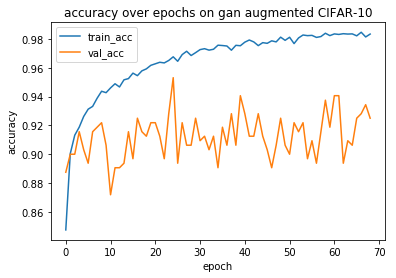

In [17]:
history = pickle.load(open('GAN/history_fake_halved.p', 'rb'))

plt.plot(range(0,len(history['loss'])),history['loss'], label='train_loss')
plt.plot(range(0,len(history['val_loss'])),history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss over epochs on gan augmented CIFAR-10')
plt.legend()
plt.show()

plt.plot(range(0,len(history['sparse_categorical_accuracy'])),history['sparse_categorical_accuracy'], label='train_acc')
plt.plot(range(0,len(history['val_sparse_categorical_accuracy'])),history['val_sparse_categorical_accuracy'], label='val_acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy over epochs on gan augmented CIFAR-10')
plt.legend()
plt.show()

In [18]:
#load dicriminator with traditional augmentation
densenet_trad = load_model("Traditional/densenet_traditional_halved.h5")
_eval3 = densenet_trad.evaluate(test_x, test_y)
predictions = densenet_trad.predict(test_x)
predictions = [np.argmax(p) for p in predictions]
labels = np.reshape(test_y, (len(predictions)))

313/313 [==============================] - 23s 75ms/step - loss: 1.5354 - sparse_categorical_accuracy: 0.9255


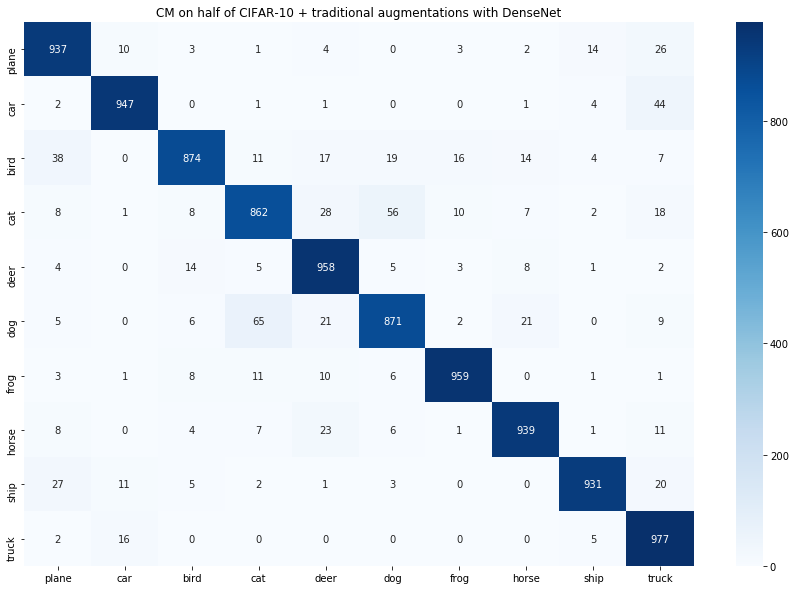

In [19]:
cm = tf.math.confusion_matrix(labels, predictions, num_classes=10)
plt.figure(figsize=(15,10))
plt.title('CM on half of CIFAR-10 + traditional augmentations with DenseNet')
sn.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt="d", xticklabels=classes, yticklabels=classes)

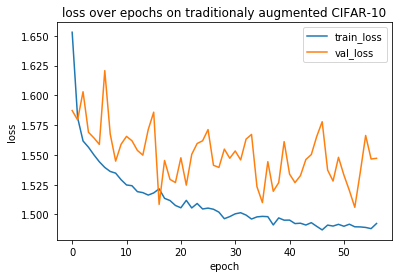

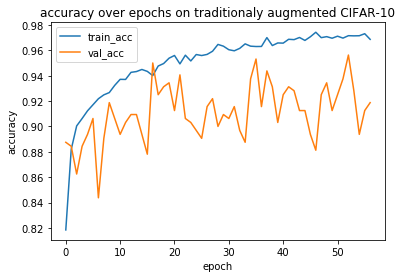

In [20]:
history = pickle.load(open('Traditional/history_traditional_halved.p', 'rb'))

plt.plot(range(0,len(history['loss'])),history['loss'], label='train_loss')
plt.plot(range(0,len(history['val_loss'])),history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss over epochs on traditionaly augmented CIFAR-10')
plt.legend()
plt.show()

plt.plot(range(0,len(history['sparse_categorical_accuracy'])),history['sparse_categorical_accuracy'], label='train_acc')
plt.plot(range(0,len(history['val_sparse_categorical_accuracy'])),history['val_sparse_categorical_accuracy'], label='val_acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy over epochs on traditionaly augmented CIFAR-10')
plt.legend()
plt.show()

# Small experiment because of curves irregularity

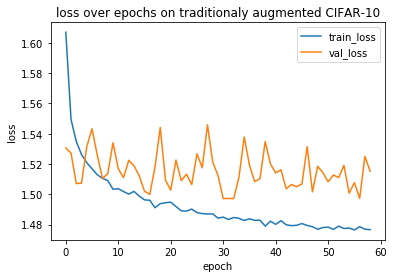

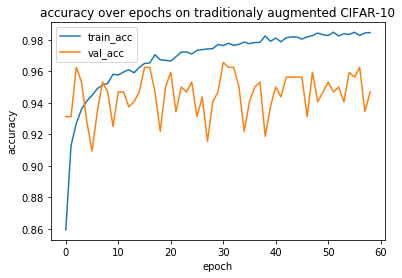

In [21]:
history = pickle.load(open('Val_test/history_val_test.p', 'rb'))

plt.plot(range(0,len(history['loss'])),history['loss'], label='train_loss')
plt.plot(range(0,len(history['val_loss'])),history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss over epochs on traditionaly augmented CIFAR-10')
plt.legend()
plt.show()

plt.plot(range(0,len(history['sparse_categorical_accuracy'])),history['sparse_categorical_accuracy'], label='train_acc')
plt.plot(range(0,len(history['val_sparse_categorical_accuracy'])),history['val_sparse_categorical_accuracy'], label='val_acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy over epochs on traditionaly augmented CIFAR-10')
plt.legend()
plt.show()

# AC-GAN Experiments

<p>First experiment is to the same as before: use the AC-GAN to generate fake images and use them to augment the CIFAR10 dataset. This augmented dataset is then used to train the DenseNet201. The accuracy of that DenseNet is measured.</p>
<p>The second experiment is to measure the accuracy of the AC-GAN discriminator instead of the DenseNet.</p>

In [5]:
history = pickle.load(open('../ACGAN/history/acgan-cifar10/evaluation/g_losses.p', 'rb'))
g_loss = [x[1] for x in history]
print(g_loss)

[3.209052562713623, 2.8819055557250977, 1.9359840154647827, 2.3249168395996094, 1.8223152160644531, 2.203221082687378, 1.6254055500030518, 1.6792821884155273, 1.8088245391845703, 1.9119541645050049, 2.201089859008789, 2.3342976570129395, 1.718576192855835, 1.9141697883605957, 1.8040392398834229, 2.3376951217651367, 2.619466543197632, 3.0210793018341064, 2.091433525085449, 2.162715196609497, 3.1108345985412598, 2.5360524654388428, 2.7809157371520996, 2.910566806793213, 3.653810501098633, 2.571138858795166, 3.637500762939453, 2.487739324569702, 2.649857521057129, 3.3007750511169434, 3.27895188331604, 3.5327351093292236, 3.8109617233276367, 3.9992172718048096, 3.521635055541992, 3.6821277141571045, 3.478564739227295, 3.7191829681396484, 3.8145039081573486, 3.7799110412597656, 4.107180118560791, 2.8276915550231934, 4.151407241821289, 3.561025857925415, 4.458230018615723, 4.655993938446045, 4.063996315002441, 4.729125022888184, 4.769586086273193, 4.584051609039307, 5.005126953125, 3.6971893